### Models

#### Model Options
- Linear Regression (or Kernelized Regression)
  - KernelDensity(kernel='linear')
- K-Nearest Neighbors
  - KernelDensity()
- Gaussian Processes
  - KernelDensity(kernel='gaussian')
- Neural Networks
- Random Forest Regressor
- Adaptive or Gradient Boosting Regressor
- "linear", "gaussian", 

In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = "data/train.csv"
df = pd.read_csv(data)

In [3]:
# extract the features & target variable from the dataframe

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
    # alt method: y = df['target']


#### Data Exploration: Target 

In [4]:
y.head()

y.describe()
# ["count", "mean", "std", "min", "q1", "q2", "q3", "max"]

,target
count,8250.000000
mean,0.867212
std,0.405036
min,-0.000000
25%,0.600000
50%,0.800000
75%,1.100000
max,3.500000


In [5]:
# compute basic descriptive statistics for the target variable
mean = np.mean(y)
median = np.median(y)
std_dev = np.std(y)
min_val = np.min(y)
max_val = np.max(y)
y_range = max_val - min_val

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)
print("Range:", y_range)


Mean: target    0.867212
dtype: float64
Median: 0.8
Standard Deviation: target    0.405011
dtype: float64
Minimum Value: target   -0.0
dtype: float64
Maximum Value: target    3.5
dtype: float64
Range: target    3.5
dtype: float64


D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


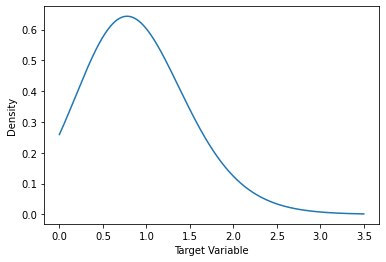

In [6]:
# create a kernel density estimate of the target's distribution
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(y.to_numpy().reshape(-1,1))

# create a set of x-values at which to evaluate the KDE
x_vals = np.linspace(min_val, max_val, 1000).reshape(-1,1)

# get the corresponding y-values by evaluating the KDE at the x-values 
y_vals = np.exp(kde.score_samples(x_vals))

# plot the KDE
plt.plot(x_vals, y_vals)
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.show()

# Alternative methods
# sns.displot(y, kind="kde")
# sns.kdeplot(y)

#### Data Exploration: Features

In [7]:
X.head()
X.describe()


,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,...,time7_delta,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set
count,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000
mean,-11.526061,-12.672970,1.051280,0.060387,0.629371,0.061248,-11.004848,-0.920364,-0.000957,-0.047842,...,-0.000018,-1.212121e-07,-0.000099,4.848485e-07,8.999901,-7.272727e-07,-0.000093,-10.000001,-0.510279,0.021982
std,259.637258,25.675733,0.320703,0.118805,0.313628,0.967274,4.140399,10.334136,0.013203,1.132179,...,0.000113,1.100964e-05,0.000615,6.963359e-05,0.000631,6.030154e-05,0.000613,0.000037,0.257113,0.006961
min,-975.000000,-95.000000,0.216536,-0.530000,-0.420000,-3.000000,-23.000000,-44.000000,-0.080000,-8.800000,...,-0.001000,-1.000000e-03,-0.006000,-2.000000e-03,8.995000,-4.000000e-03,-0.005000,-10.003000,-0.916291,0.012000
25%,-175.000000,-29.000000,0.802519,-0.020000,0.430000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.693147,0.018000
50%,-23.000000,-13.000000,1.020201,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.510826,0.020000
75%,157.000000,3.000000,1.258600,0.130000,0.800000,0.700000,-7.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.356675,0.023000
max,946.000000,94.000000,2.886371,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,8.700000,...,0.000600,0.000000e+00,0.003000,6.000000e-03,9.005000,2.000000e-03,0.007000,-10.000000,0.693147,0.073000


In [8]:
feature_list = X.columns.values.tolist()

# for each in feature_list:
    
    # same procedure as with target --- for each feature

# Alternative methods?
# sns.displot(y, kind="kde")
# sns.kdeplot(y)
# sns.displot(X, kind="kde")
mean = np.mean(X,axis=0)
median = np.median(X,axis=0)
std_dev = np.std(X,axis=0)
min_val = np.min(X,axis=0)
max_val = np.max(X,axis=0)
range = max_val - min_val

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)
print("Range:", range)

Mean: acc_rate           -1.152606e+01
track              -1.267297e+01
m                   1.051280e+00
n                   6.038667e-02
current_pitch       6.293709e-01
current_roll        6.124848e-02
absoluate_roll     -1.100485e+01
climb_delta        -9.203636e-01
roll_rate_delta    -9.567273e-04
climb_delta_diff   -4.784242e-02
time1               2.187236e-02
time2               2.188558e-02
time3               2.188558e-02
time4               2.189782e-02
time5               2.189794e-02
time6               2.191770e-02
time7               2.191818e-02
time8               2.193745e-02
time9               2.193745e-02
time10              2.195418e-02
time11              4.390739e-02
time12              2.196885e-02
time13              2.196921e-02
time14              2.198194e-02
time1_delta        -1.320000e-04
time2_delta        -1.212121e-07
time3_delta        -6.266667e-05
time4_delta        -3.636364e-07
time5_delta        -8.072727e-05
time6_delta        -7.272727e-07
time

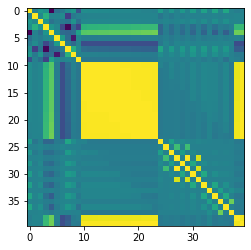

In [9]:
# cov matrix for 40 features
cov = np.corrcoef(X.T)
plt.imshow(cov)
plt.show()

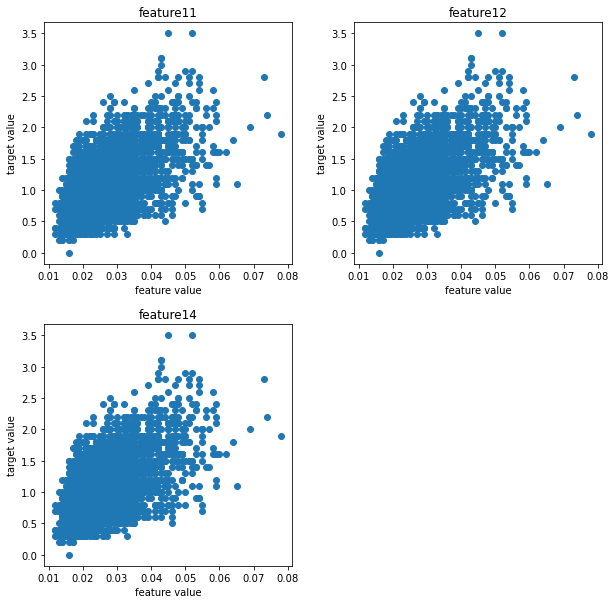

In [10]:
# scatter plot for three most correlated feature and target
correlation = np.corrcoef(df.T)[:-1, -1]
temp = sorted(np.argsort(correlation)[-4:-1])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.25,hspace=0.25)
for i, n in enumerate(temp):
    feature = X.iloc[:, n]
    plt.subplot(2, 2, i+1)
    plt.title('feature' + str(n))
    plt.scatter(feature, y)
    plt.xlabel('feature value')
    plt.ylabel('target value')
plt.show()

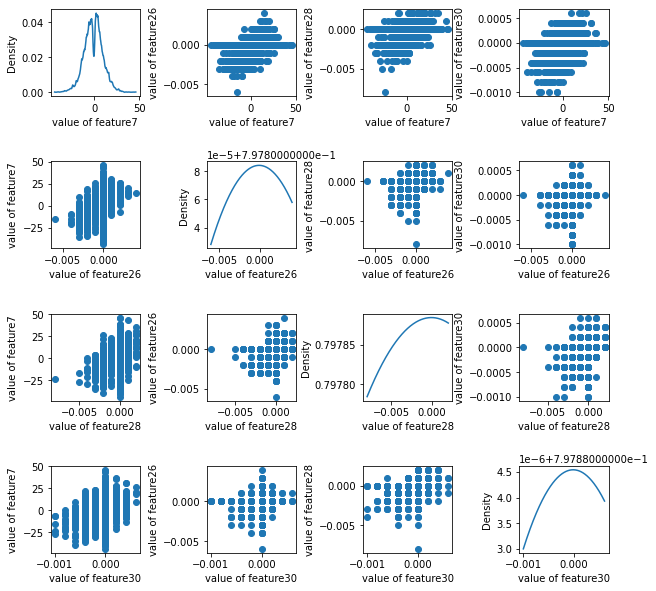

In [11]:
# choose a feature and find three most correlated feature, for example, 28
correlation = cov[:, 28]
temp = sorted(np.argsort(correlation)[-4:])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.75,hspace=0.75)
for i, temp1 in enumerate(temp):
    for j, temp2 in enumerate(temp):
        feature1 = X.iloc[:, temp1]
        feature2 = X.iloc[:, temp2]
        if i == j:
            kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(feature1.to_numpy().reshape(-1, 1))
            # create a set of x-values at which to evaluate the KDE
            x_vals = np.linspace(np.min(feature1), np.max(feature2), 1000).reshape(-1, 1)
            # get the corresponding y-values by evaluating the KDE at the x-values
            y_vals = np.exp(kde.score_samples(x_vals))
            plt.subplot(4, 4, 4*i+j+1)

            plt.plot(x_vals, y_vals)
            plt.xlabel('value of feature' + str(temp1))
            plt.ylabel('Density')
        else:
            plt.subplot(4, 4, 4*i+j+1)
            plt.scatter(feature1, feature2)
            plt.xlabel('value of feature' + str(temp1))
            plt.ylabel('value of feature' + str(temp2))
plt.show()

## Baseline Models

In [17]:
# random forest regressor
kf = KFold(n_splits=10)
random_forest_regressor = RandomForestRegressor(n_estimators=10)
kng = KNeighborsRegressor(n_neighbors=4)
models = [('rf', random_forest_regressor), ('KNN', kng)]
in_sample_error = []
out_sample_error = []
for name, model in models:
    in_sample_err = []
    out_sample_err = []
    for train, test in kf.split(X):
        model.fit(X.iloc[train], np.ravel(y.iloc[train]))
        model.fit(X.iloc[train], np.ravel(y.iloc[train]))
        predict_train = model.predict(X.iloc[train])
        predict_test = model.predict(X.iloc[test])
        in_sample_err.append(MSE(predict_train, y.iloc[train]))
        out_sample_err.append(MSE(predict_test, y.iloc[test]))
    in_sample_error.append(in_sample_err)
    out_sample_error.append(out_sample_err)
    print(name,'in sample error:',np.mean(in_sample_err))
    print(name,'out sample error:',np.mean(out_sample_err))
print(stats.ttest_rel(in_sample_error[0], in_sample_error[1]))

rf in sample error: 0.005243117845117845
rf out sample error: 0.02973146666666667
KNN in sample error: 0.07571007575757575
KNN out sample error: 0.1290675
Ttest_relResult(statistic=-202.73646545478076, pvalue=8.79214835495977e-18)


In [16]:
# kde for z-score error for each model